In [2]:
!pip install tensorflow
import tensorflow as tf
tf.test.gpu_device_name()

''

In [3]:
!pip install nibabel
!pip install numpy
!pip install matplotlib
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from google.colab import files
uploaded = files.upload()

Saving CT_Abdo.nii.gz to CT_Abdo.nii.gz


In [5]:
file_path = list(uploaded.keys())[0]
mri = nib.load('/content/CT_Abdo.nii.gz').get_fdata()
print('MRI Shape:', mri.shape)

MRI Shape: (255, 178, 256)


(np.float64(-0.5), np.float64(177.5), np.float64(254.5), np.float64(-0.5))

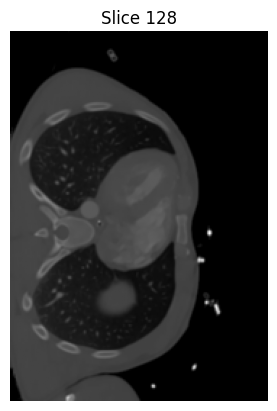

In [6]:
slice_index = mri.shape[2] // 2
plt.imshow(mri[:, :, slice_index], cmap='gray')
plt.title(f'Slice {slice_index}')
plt.axis('off')

In [8]:
slices = [mri[:, :, i] for i in range(mri.shape[2])]
len(slices)

256

(np.float64(-0.5), np.float64(177.5), np.float64(254.5), np.float64(-0.5))

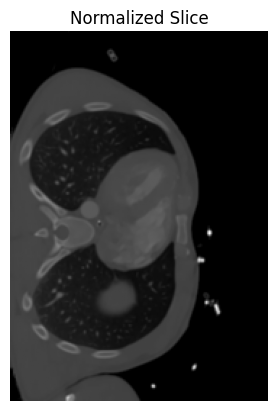

In [9]:
norm_slice = (mri[:, :, slice_index] - np.min(mri)) / (np.max(mri) - np.min(mri))
plt.imshow(norm_slice, cmap='gray')
plt.title('Normalized Slice')
plt.axis('off')

(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

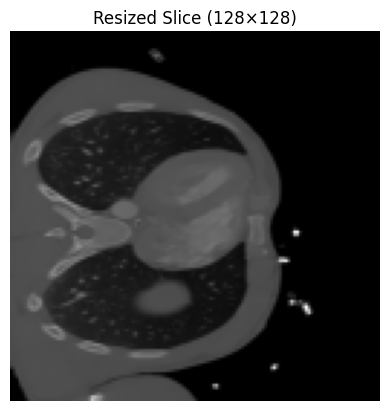

In [10]:
import tensorflow as tf
resized = tf.image.resize(norm_slice[..., None], (128, 128))
plt.imshow(resized.numpy().squeeze(), cmap='gray')
plt.title('Resized Slice (128×128)')
plt.axis('off')

In [18]:
# Create a 1-row, 2-column figure and access the first subplot (index 1)
def plot_slices(filepath,indices):
  mri = nib.load(filepath).get_fdata()
  print('MRI Shape:', mri.shape)
  third_dim=mri.shape[indices]
  slice_indices = [third_dim // 6, third_dim*2//6,third_dim*3//6,third_dim*4//6,third_dim*5//6]
  plt.subplot(3,2,1)
  plt.imshow(mri[:, :, slice_indices[0]], cmap='gray')
  plt.title(f'Slice {slice_indices[0]}')
  plt.axis('off')

  plt.subplot(3,2,2)
  plt.imshow(mri[:, :, slice_indices[1]], cmap='gray')
  plt.title(f'Slice {slice_indices[1]}')
  plt.axis('off')

  plt.subplot(3,2,3)
  plt.imshow(mri[:, :, slice_indices[2]], cmap='gray')
  plt.title(f'Slice {slice_indices[2]}')
  plt.axis('off')

  plt.subplot(3,2,4)
  plt.imshow(mri[:, :, slice_indices[3]], cmap='gray')
  plt.title(f'Slice {slice_indices[3]}')
  plt.axis('off')

  plt.subplot(3,2,5)
  plt.imshow(mri[:, :, slice_indices[4]], cmap='gray')
  plt.title(f'Slice {slice_indices[4]}')
  plt.axis('off')


  # Add a main title for the entire figure
  plt.suptitle("5 slices  Plots")
  plt.show()

  normalize_the_slice(mri,2)


In [17]:
def normalize_the_slice(arr,indice):
  mri=arr
  slice_index=indice
  norm_slice = (mri[:, :, slice_index] - np.min(mri)) / (np.max(mri) - np.min(mri))
  plt.imshow(norm_slice, cmap='gray')
  plt.title('Normalized Slice')
  plt.axis('off')

MRI Shape: (255, 178, 256)


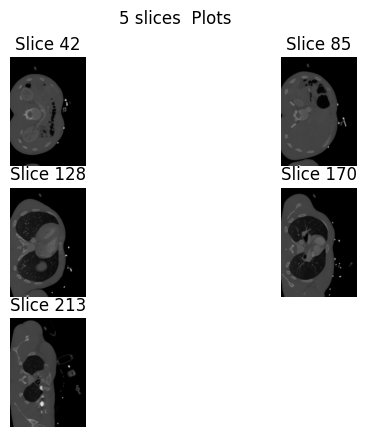

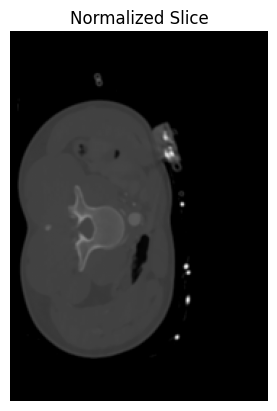

In [19]:
plot_slices('/content/CT_Abdo.nii.gz',2)